In [1]:
import xarray as xr
import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from netCDF4 import Dataset
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
ctd = xr.open_mfdataset('/home/z3526974/Work/data/dipole_work/in2017_v04CtdAvg_nc/*.nc',concat_dim='time')
ctd

<xarray.Dataset>
Dimensions:                  (latitude: 37, longitude: 37, pressure: 2035, time: 37)
Coordinates:
  * latitude                 (latitude) float64 -35.71 -35.64 ... -27.1 -27.0
  * pressure                 (pressure) float64 2.321 2.359 ... 2e+03 2.001e+03
  * longitude                (longitude) float64 151.6 151.6 ... 156.0 156.1
  * time                     (time) datetime64[ns] 2017-08-31T23:07:48.568996352 ... 2017-09-15T22:50:50.572999680
Data variables:
    woce_date                (time) float64 dask.array<shape=(37,), chunksize=(1,)>
    woce_time                (time) float64 dask.array<shape=(37,), chunksize=(1,)>
    temperature              (longitude, latitude, pressure, time) float64 dask.array<shape=(37, 37, 2035, 37), chunksize=(37, 37, 2035, 1)>
    temperatureFlag          (longitude, latitude, pressure, time) float32 dask.array<shape=(37, 37, 2035, 37), chunksize=(37, 37, 2035, 1)>
    conductivity             (longitude, latitude, pressure, time) fl

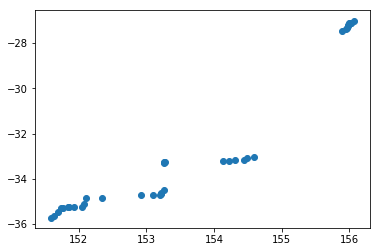

In [11]:
plt.scatter(ctd.longitude,ctd.latitude)

In [12]:
t_slice = slice('2017-09-12','2017-09-12')
ctd_t = ctd.sel(time=t_slice)
ctd_t

<xarray.Dataset>
Dimensions:                  (latitude: 37, longitude: 37, pressure: 2035, time: 1)
Coordinates:
  * latitude                 (latitude) float64 -35.71 -35.64 ... -27.1 -27.0
  * pressure                 (pressure) float64 2.321 2.359 ... 2e+03 2.001e+03
  * longitude                (longitude) float64 151.6 151.6 ... 156.0 156.1
  * time                     (time) datetime64[ns] 2017-09-12T11:52:49.381997568
Data variables:
    woce_date                (time) float64 dask.array<shape=(1,), chunksize=(1,)>
    woce_time                (time) float64 dask.array<shape=(1,), chunksize=(1,)>
    temperature              (longitude, latitude, pressure, time) float64 dask.array<shape=(37, 37, 2035, 1), chunksize=(37, 37, 2035, 1)>
    temperatureFlag          (longitude, latitude, pressure, time) float32 dask.array<shape=(37, 37, 2035, 1), chunksize=(37, 37, 2035, 1)>
    conductivity             (longitude, latitude, pressure, time) float64 dask.array<shape=(37, 37, 2035, 1

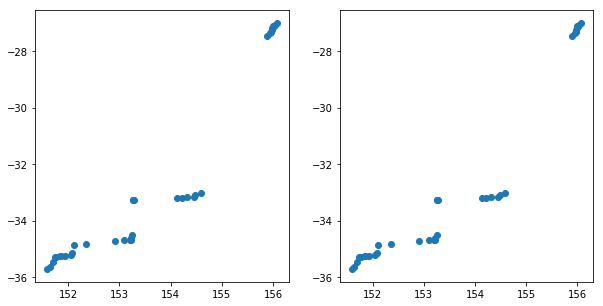

In [20]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.scatter(ctd.longitude,ctd.latitude)
plt.subplot(1,2,2)
plt.scatter(ctd_t.longitude,ctd_t.latitude)

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([736583.995016, 736584.095016, 736584.195016, 736584.295016,
        736584.395016, 736584.495016, 736584.595016, 736584.695016,
        736584.795016, 736584.895016, 736584.995016]),
 <a list of 10 Patch objects>)

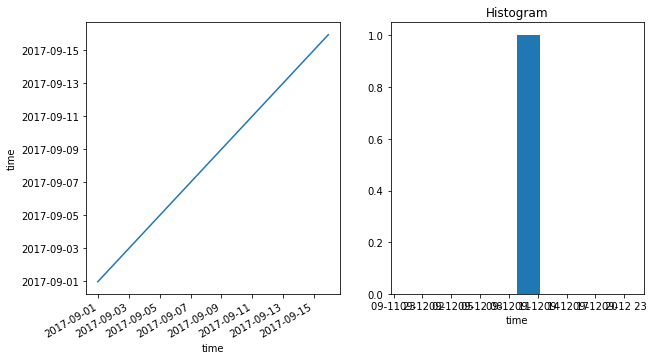

In [17]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
ctd.time.plot()

plt.subplot(1,2,2)
ctd_t.time.plot()

In [18]:
ctd_t.time.shape

(1,)